# SOLUTION

## Nettoyage et Préparation des Données

### Importation des bibliothèques nécessaires et Chargement des données depuis le fichier Excel

In [5]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np

# Chargement des données depuis le fichier Excel
file_path = 'DATA.xlsx'
data = pd.read_excel(file_path, sheet_name='Donnees')

### Aperçu initial des données

In [7]:
# Aperçu initial des données
print("Aperçu initial des données :")
print(data.head())

Aperçu initial des données :
   Unnamed: 0 Unnamed: 1 Unnamed: 2                  Unnamed: 3  \
0         NaN        NaN        NaN                         NaN   
1         NaN        NaN        NaN                         NaN   
2         NaN  CATEGORIE      GRADE  DERNIER AVACEMENT EN GRADE   
3         NaN        M&C         11         1998-07-01 00:00:00   
4         NaN        M&C         11         1998-09-01 00:00:00   

      Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0            NaN        NaN        NaN        NaN        NaN        NaN   
1            NaN        NaN        NaN        NaN        NaN        NaN   
2  SALAIRE  PERS      CITE        SEXE  ETATCIVIL  INDEPOUSE     ENFANT   
3    47865.44225         06          M          4          1          0   
4    47652.18334         05          M          0          0          0   

  Unnamed: 10          Unnamed: 11          Unnamed: 12 Unnamed: 13  \
0         NaN                  NaN            

### Étape 1 : Identifier la ligne contenant les noms des colonnes

In [9]:
# Étape 1 : Identifier la ligne contenant les noms des colonnes
# Ici, on considère que les colonnes sont définies à la 3ème ligne (index 2)
data.columns = data.iloc[2]
data = data[3:]  # Supprimer les lignes inutiles au-dessus des colonnes

### Étape 2 : Renommer les colonnes pour éviter les problèmes liés aux espaces ou aux noms vides

In [11]:
# Étape 2 : Renommer les colonnes pour éviter les problèmes liés aux espaces ou aux noms vides
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('nan', 'Unknown')

### Étape 3 : Vérification des valeurs manquantes

In [13]:
# Étape 3 : Vérification des valeurs manquantes
print("\nVérification des valeurs manquantes :")
print(data.isnull().sum())

# Remplacement des valeurs manquantes si nécessaire
# Par exemple : remplacer les NaN dans les colonnes numériques par la médiane
for column in data.select_dtypes(include=['float', 'int']):
    data[column] = data[column].fillna(data[column].median())


Vérification des valeurs manquantes :
2
NaN                           2541
CATEGORIE                        0
GRADE                            0
DERNIER_AVACEMENT_EN_GRADE       2
SALAIRE__PERS                    0
CITE                             1
SEXE                             0
ETATCIVIL                        4
INDEPOUSE                       22
ENFANT                           0
COTATION                         5
DATENAISSA                       0
DATEENGAGE                       0
TRP                              0
LGT                              0
SSANTE                           0
ENERGIE                          0
IFT                              0
IDP                              0
IPM                              0
dtype: int64


### Étape 4 : Conversion des colonnes au bon type de données

In [15]:
# Étape 4 : Conversion des colonnes au bon type de données
# Exemple : convertir les colonnes contenant des dates
date_columns = ['DERNIER_AVACEMENT_EN_GRADE', 'DATENAISSA', 'DATEENGAGE']
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

print(data.dtypes)

2
NaN                                  float64
CATEGORIE                             object
GRADE                                 object
DERNIER_AVACEMENT_EN_GRADE    datetime64[ns]
SALAIRE__PERS                         object
CITE                                  object
SEXE                                  object
ETATCIVIL                             object
INDEPOUSE                             object
ENFANT                                object
COTATION                              object
DATENAISSA                    datetime64[ns]
DATEENGAGE                    datetime64[ns]
TRP                                   object
LGT                                   object
SSANTE                                object
ENERGIE                               object
IFT                                   object
IDP                                   object
IPM                                   object
dtype: object


### Étape 5 : Suppression des doublons éventuels

In [17]:
# Étape 5 : Suppression des doublons éventuels
data = data.drop_duplicates()

### Étape 6 : Suppression des colonnes ou lignes non pertinentes

In [19]:
# Étape 6 : Suppression des colonnes ou lignes non pertinentes
# Exemple : supprimer les colonnes entièrement vides ou avec une seule valeur
data = data.dropna(axis=1, how='all')  # Supprimer les colonnes entièrement vides
data = data.loc[:, data.nunique() > 1]  # Garder uniquement les colonnes avec des variations

### Étape 7 : Améliorer le nettoyage des colonnes textuelles

In [21]:
# Étape 1 : Analyser les valeurs manquantes pour les colonnes textuelles
missing_counts = data.select_dtypes(include=['object']).isnull().sum()
print("Nombre de valeurs manquantes par colonne textuelle :")
print(missing_counts)

# Étape 2 : Décider d'une stratégie pour chaque colonne textuelle
for column in data.select_dtypes(include=['object']).columns:
    missing_count = data[column].isnull().sum()
    total_count = len(data[column])
    missing_percentage = (missing_count / total_count) * 100
    
    print(f"\nColonne '{column}': {missing_count} valeurs manquantes ({missing_percentage:.2f}%)")
    
    # Stratégie 1 : Supprimer la colonne si trop de données manquantes
    if missing_percentage > 50:
        print(f"--> Suppression de la colonne '{column}' (trop de valeurs manquantes)")
        data.drop(columns=[column], inplace=True)
    
    # Stratégie 2 : Remplacer par la valeur la plus fréquente si peu de données manquantes
    elif 0 < missing_percentage <= 50:
        most_frequent_value = data[column].mode()[0]  # Mode (valeur la plus fréquente)
        print(f"--> Remplissage des valeurs manquantes avec '{most_frequent_value}'")
        data[column] = data[column].fillna(most_frequent_value)

# Étape 3 : Vérification après nettoyage
print("\nVérification des valeurs manquantes après nettoyage :")
print(data.select_dtypes(include=['object']).isnull().sum())

Nombre de valeurs manquantes par colonne textuelle :
2
GRADE             0
SALAIRE__PERS     0
CITE              1
SEXE              0
ETATCIVIL         4
INDEPOUSE        22
ENFANT            0
COTATION          5
TRP               0
LGT               0
SSANTE            0
IFT               0
IDP               0
dtype: int64

Colonne 'GRADE': 0 valeurs manquantes (0.00%)

Colonne 'SALAIRE__PERS': 0 valeurs manquantes (0.00%)

Colonne 'CITE': 1 valeurs manquantes (0.04%)
--> Remplissage des valeurs manquantes avec '01'

Colonne 'SEXE': 0 valeurs manquantes (0.00%)

Colonne 'ETATCIVIL': 4 valeurs manquantes (0.16%)
--> Remplissage des valeurs manquantes avec '4'

Colonne 'INDEPOUSE': 22 valeurs manquantes (0.87%)
--> Remplissage des valeurs manquantes avec '1'

Colonne 'ENFANT': 0 valeurs manquantes (0.00%)

Colonne 'COTATION': 5 valeurs manquantes (0.20%)
--> Remplissage des valeurs manquantes avec '90'

Colonne 'TRP': 0 valeurs manquantes (0.00%)

Colonne 'LGT': 0 valeurs manquantes (


Résumé des valeurs NaN :
                                              Colonnes  Valeurs NaN     % NaN
2                                                                            
DERNIER_AVACEMENT_EN_GRADE  DERNIER_AVACEMENT_EN_GRADE            2  0.078709
GRADE                                            GRADE            0  0.000000
SALAIRE__PERS                            SALAIRE__PERS            0  0.000000
CITE                                              CITE            0  0.000000
SEXE                                              SEXE            0  0.000000
ETATCIVIL                                    ETATCIVIL            0  0.000000
INDEPOUSE                                    INDEPOUSE            0  0.000000
ENFANT                                          ENFANT            0  0.000000
COTATION                                      COTATION            0  0.000000
DATENAISSA                                  DATENAISSA            0  0.000000
DATEENGAGE                            

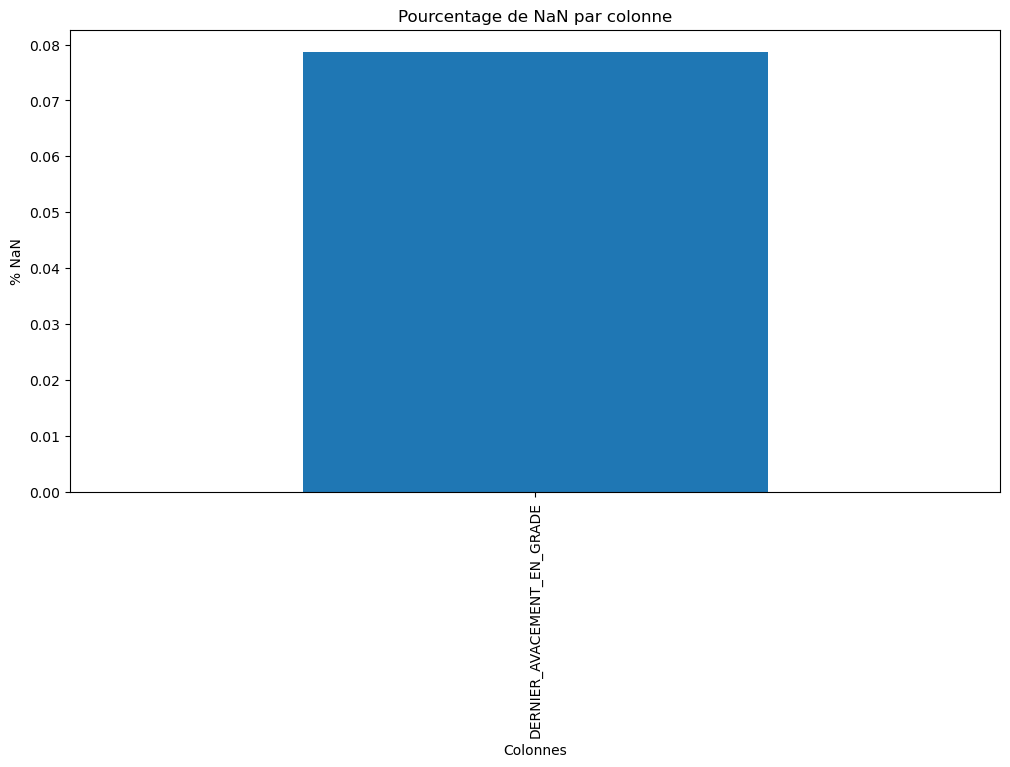

C:\Users\baldo\AppData\Local\Temp\ipykernel_10972\1681676800.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['SEXE'] = data['SEXE'].replace({'F': 0, 'M': 1})


In [22]:
# Vérification des valeurs NaN par colonne
nan_summary = data.isnull().sum()
total_rows = len(data)
nan_percentage = (nan_summary / total_rows) * 100

# Affichage du résumé des NaN
nan_report = pd.DataFrame({
    'Colonnes': data.columns,
    'Valeurs NaN': nan_summary,
    '% NaN': nan_percentage
}).sort_values(by='% NaN', ascending=False)

print("\nRésumé des valeurs NaN :")
print(nan_report)

# Visualisation des colonnes avec NaN
import matplotlib.pyplot as plt

nan_report[nan_report['Valeurs NaN'] > 0].set_index('Colonnes')['% NaN'].plot(kind='bar', figsize=(12, 6))
plt.title("Pourcentage de NaN par colonne")
plt.ylabel("% NaN")
plt.xlabel("Colonnes")
plt.show()

# Remplacer 'F' par 0 et 'M' par 1 dans la colonne 'SEXE'
data['SEXE'] = data['SEXE'].replace({'F': 0, 'M': 1})


# Identifier les colonnes numériques
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Remplacer les valeurs non numériques par NaN dans les colonnes numériques
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

### Aperçu final des données nettoyées

In [24]:
# Aperçu final des données nettoyées
print("\nAperçu des données nettoyées :")
print(data.head())


Aperçu des données nettoyées :
2 GRADE DERNIER_AVACEMENT_EN_GRADE SALAIRE__PERS CITE  SEXE ETATCIVIL  \
3    11                 1998-07-01   47865.44225   06     1         4   
4    11                 1998-09-01   47652.18334   05     1         0   
5    11                 2000-08-01   47348.71096   06     1         4   
6    11                 2000-10-01   47115.68266   01     1         4   
7    11                 2000-12-01   47344.56758   02     1         4   

2 INDEPOUSE ENFANT COTATION DATENAISSA DATEENGAGE     TRP       LGT  \
3         1      0       64 1950-06-02 1968-09-01  124800  91627.03   
4         0      0       68 1954-01-01 1980-04-14  124800  91627.03   
5         1      0       67 1960-02-02 1987-12-14  124800  91627.03   
6         1      0       63 1953-01-15 1977-08-15  124800  91627.03   
7         1      1       65 1963-05-24 1987-12-14  124800  91627.03   

2     SSANTE       IFT        IDP  
3  270515.44  97837.51  126115.18  
4  270515.44  97837.51  126115

### Sauvegarde des données nettoyées dans un nouveau fichier pour une utilisation ultérieure

In [26]:
# Sauvegarde des données nettoyées dans un nouveau fichier pour une utilisation ultérieure
data.to_excel('Donnees_Nettoyees.xlsx', index=False)
print("\nLes données nettoyées ont été sauvegardées dans 'Donnees_Nettoyees.xlsx'.")


Les données nettoyées ont été sauvegardées dans 'Donnees_Nettoyees.xlsx'.


## Analyse Exploratoire des Données (EDA)

### Importation des bibliothèques nécessaires

In [29]:
# Importation des bibliothèques nécessaires
# import matplotlib.pyplot as plt déjà importé plus haut
import seaborn as sns

### Étape 1 : Statistiques descriptives

In [31]:
# Étape 1 : Statistiques descriptives
print("\nStatistiques descriptives :")
print(data.describe())


Statistiques descriptives :
2         DERNIER_AVACEMENT_EN_GRADE         SEXE  \
count                           2539  2541.000000   
mean   2017-02-15 03:25:18.550610432     0.824085   
min              1993-01-01 00:00:00     0.000000   
25%              2015-09-01 00:00:00     1.000000   
50%              2018-01-01 00:00:00     1.000000   
75%              2022-01-01 00:00:00     1.000000   
max              2024-07-01 00:00:00     1.000000   
std                              NaN     0.380823   

2                         DATENAISSA                     DATEENGAGE  
count                           2541                           2541  
mean   1960-04-13 23:15:47.815820544  1985-03-22 14:00:59.504132224  
min              1944-07-01 00:00:00            1965-11-25 00:00:00  
25%              1955-09-26 00:00:00            1979-03-19 00:00:00  
50%              1959-05-04 00:00:00            1983-10-01 00:00:00  
75%              1963-08-21 00:00:00            1989-07-20 00:00:00  
max

### Étape 2 : Histogrammes pour voir les distributions

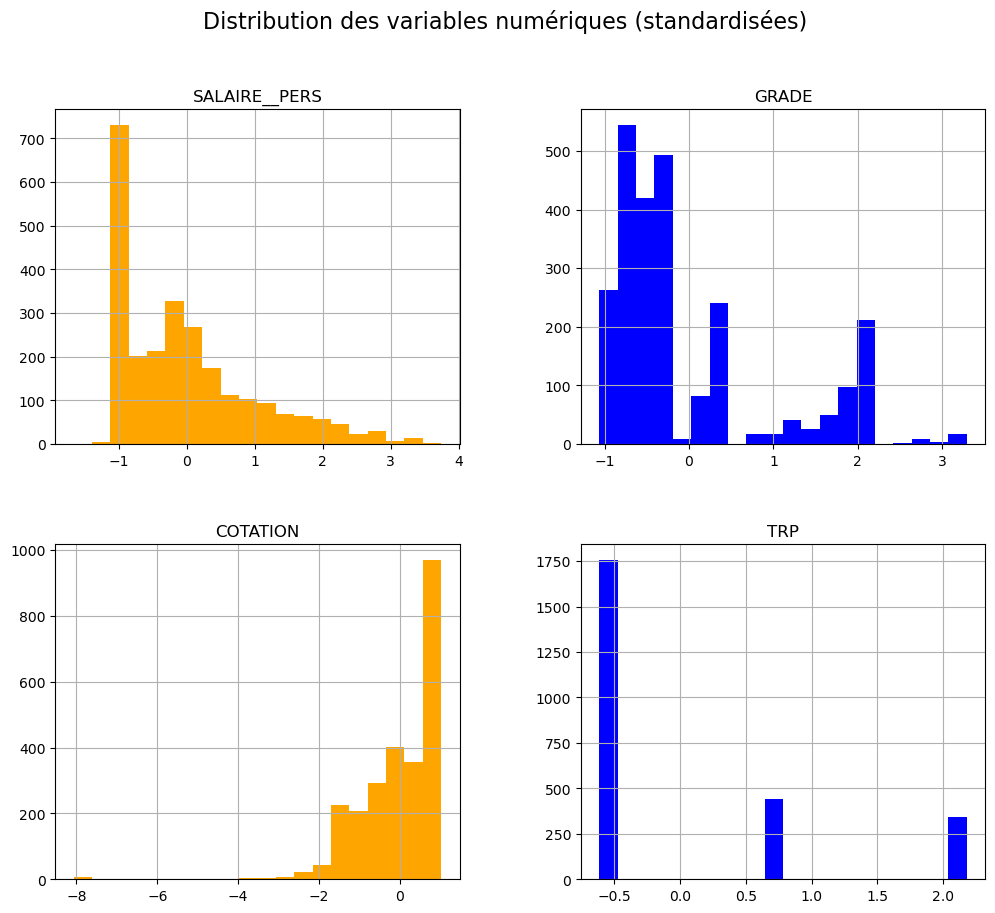

In [33]:
from sklearn.preprocessing import StandardScaler

# Reconversion après standardisation
scaler = StandardScaler()
numeric_columns = ['SALAIRE__PERS', 'GRADE', 'COTATION', 'TRP'] 
data_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)

# Créer les histogrammes avec des couleurs personnalisées
axes = data_scaled.hist(figsize=(12, 10), bins=20)

# Appliquer les couleurs
for i, ax in enumerate(axes.flatten()):
    for patch in ax.patches:
        patch.set_facecolor('orange' if i % 2 == 0 else 'blue')

plt.suptitle("Distribution des variables numériques (standardisées)", fontsize=16)
plt.show()


Analyse des variables catégoriques :

Répartition des valeurs pour la colonne 'GRADE':
GRADE
13    544
14    419
16    348
19    241
29    211
11    188
15    145
28     97
18     82
12     75
24     41
26     35
25     26
23     17
21     16
27     15
36     11
33      9
17      8
35      7
34      3
22      2
32      1
Name: count, dtype: int64


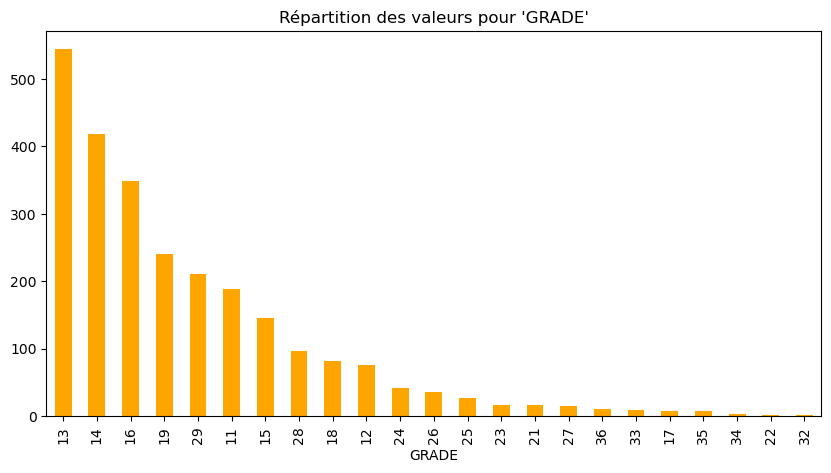


Répartition des valeurs pour la colonne 'SALAIRE__PERS':
SALAIRE__PERS
46759.17762    12
46771.17762    10
50670.68815     8
50497.36517     7
46797.17762     6
               ..
49857.81810     1
50191.71253     1
49543.50151     1
48995.09101     1
54110.64791     1
Name: count, Length: 2363, dtype: int64


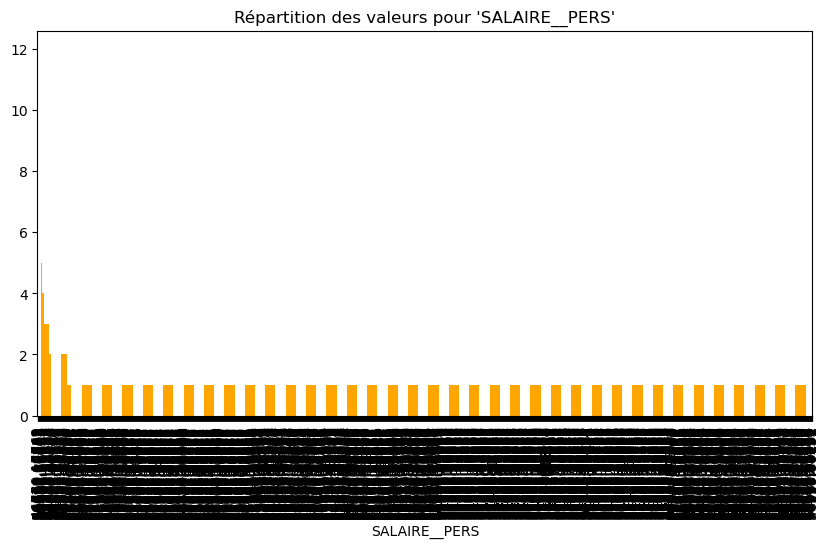


Répartition des valeurs pour la colonne 'CITE':
CITE
01    1309
02     260
07     159
12     146
06     123
10      94
14      78
09      72
03      71
16      56
05      50
04      30
15      30
11      28
13      26
08       9
Name: count, dtype: int64


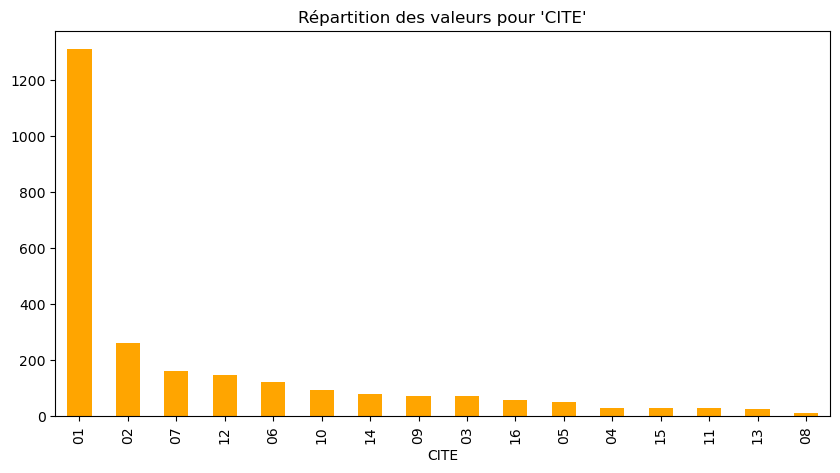


Répartition des valeurs pour la colonne 'ETATCIVIL':
ETATCIVIL
4    2117
0     411
1      11
3       2
Name: count, dtype: int64


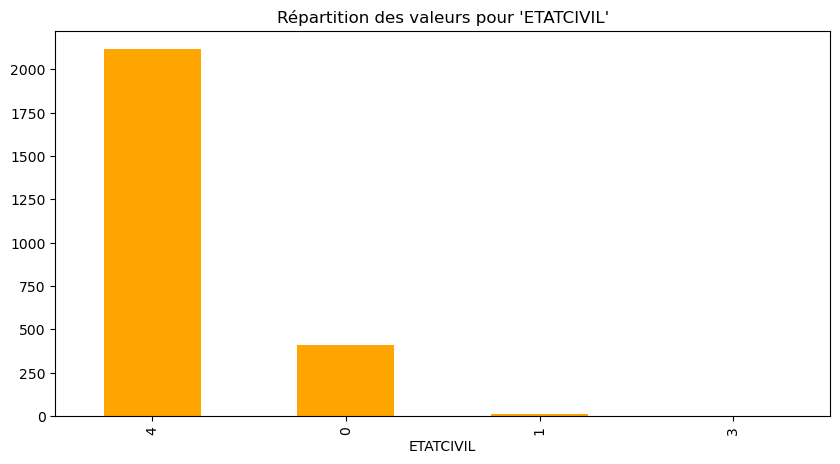


Répartition des valeurs pour la colonne 'INDEPOUSE':
INDEPOUSE
1    1978
0     563
Name: count, dtype: int64


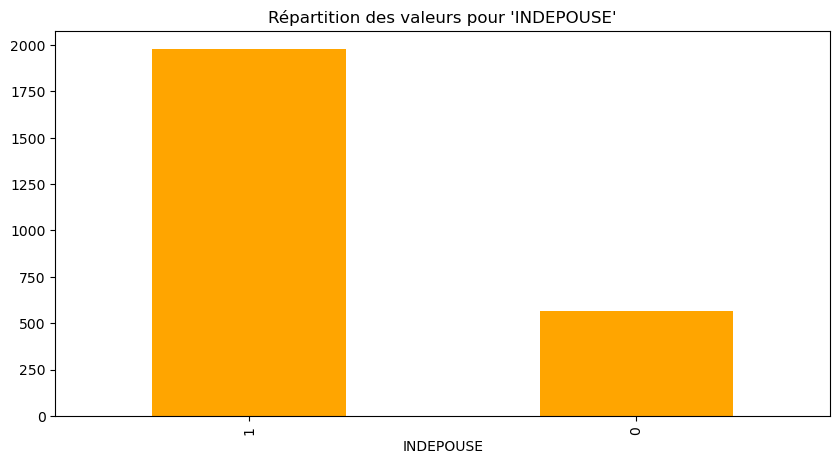


Répartition des valeurs pour la colonne 'ENFANT':
ENFANT
0     1096
1      350
2      303
3      248
4      203
5      136
6       81
7       63
8       23
9       15
10      12
12       4
11       3
14       2
13       2
Name: count, dtype: int64


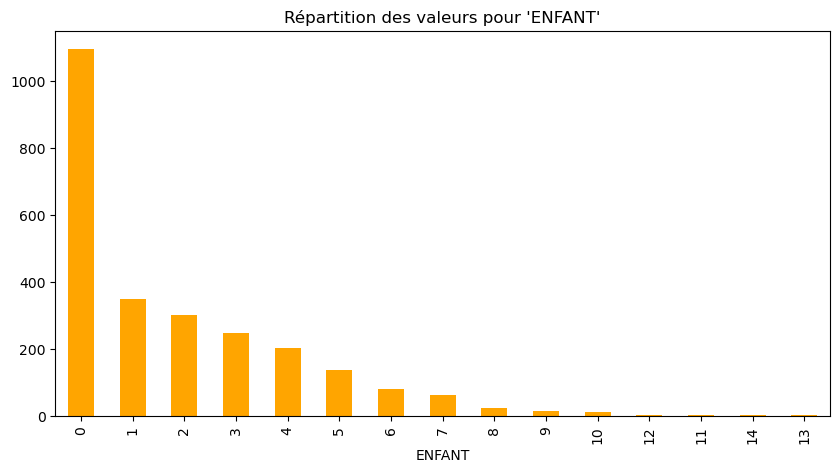


Répartition des valeurs pour la colonne 'COTATION':
COTATION
90    329
89    246
88    199
64    179
82    114
80    113
78    105
86    105
76     98
84     97
87     90
70     90
85     88
75     70
79     66
74     66
81     60
73     59
72     59
83     57
77     57
71     28
66     17
67     17
68     16
58     15
69     14
65     14
60     12
62     11
63     10
0       7
59      5
61      5
56      4
54      3
57      2
52      2
55      2
48      2
50      1
43      1
51      1
47      1
49      1
41      1
42      1
45      1
Name: count, dtype: int64


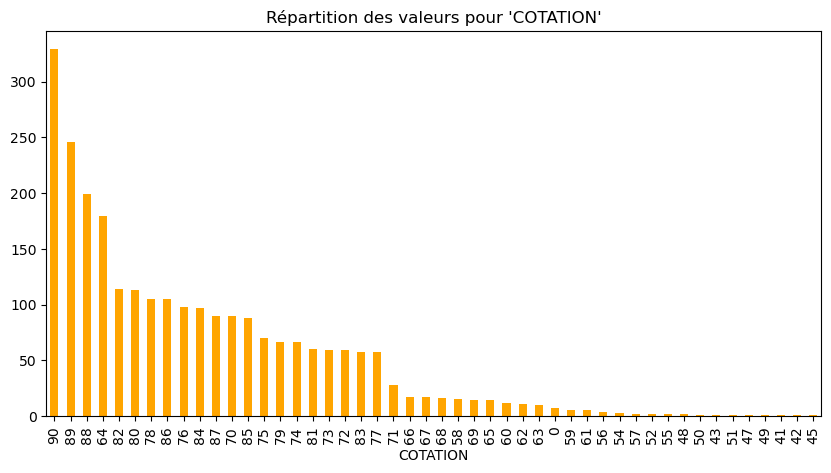


Répartition des valeurs pour la colonne 'TRP':
TRP
124800       1754
133036.8      443
141816.48     344
Name: count, dtype: int64


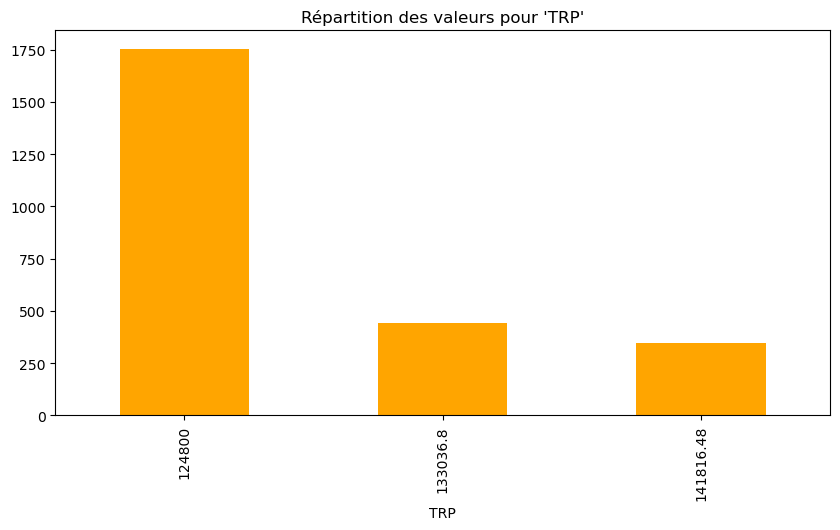


Répartition des valeurs pour la colonne 'LGT':
LGT
109279.94    947
91627.03     807
129454.7     443
167282.38    344
Name: count, dtype: int64


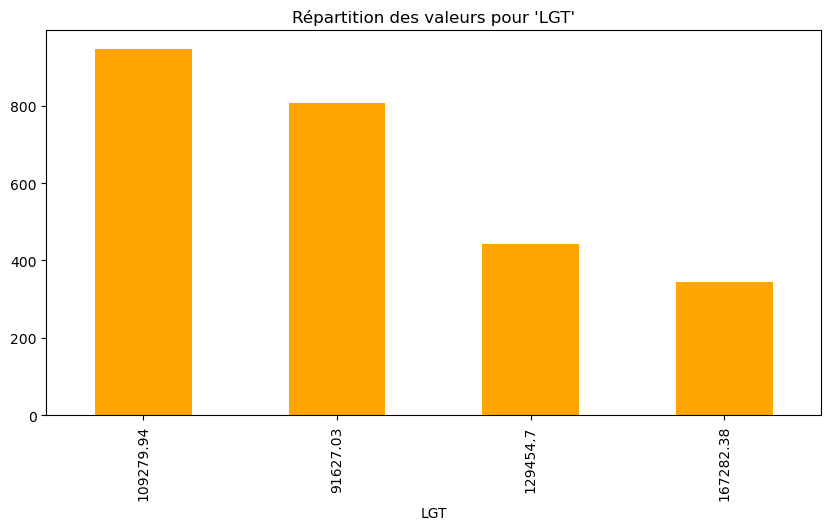


Répartition des valeurs pour la colonne 'SSANTE':
SSANTE
284103.39    544
295733.77    435
308597.35    365
348626.74    285
388677.48    222
270515.44    188
303202.61    147
337017.91    109
378010.7     104
276179.05     75
329575.35     49
366285.25     18
Name: count, dtype: int64


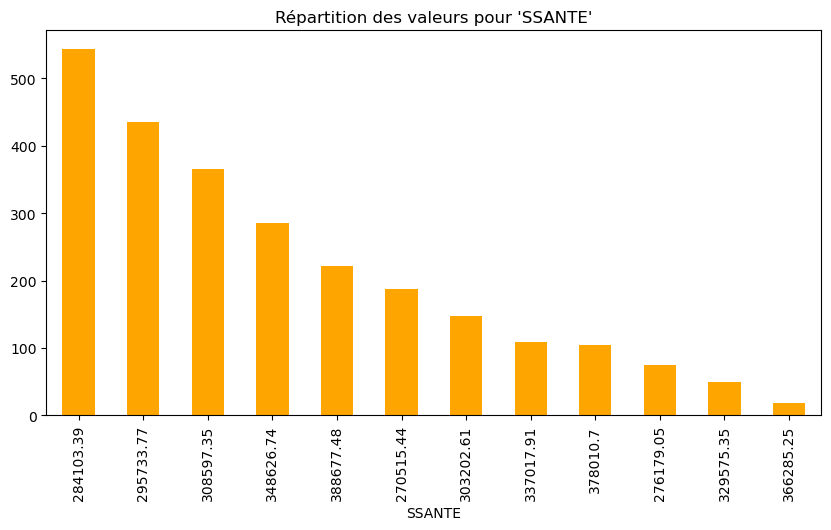


Répartition des valeurs pour la colonne 'IFT':
IFT
98225.63     544
105181.19    443
98417.79     435
100306.3     365
115345.85    222
97837.51     188
99454.53     147
115228.2     104
97999.91      75
115011.72     18
Name: count, dtype: int64


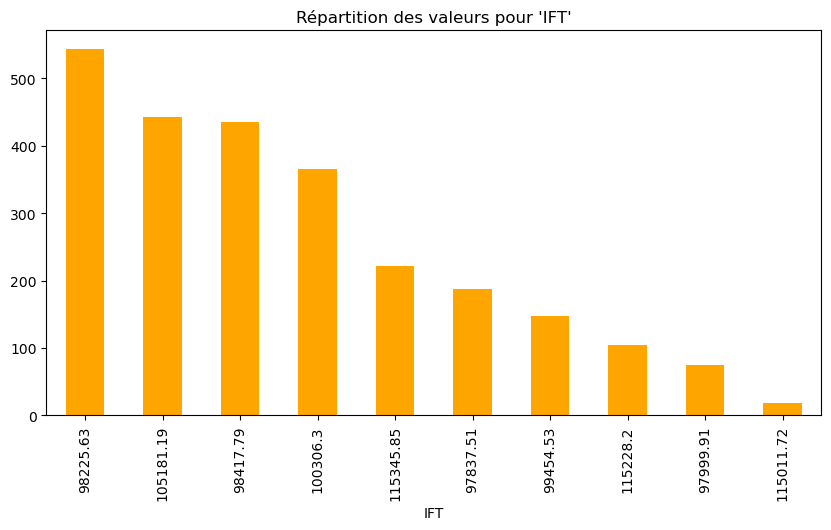


Répartition des valeurs pour la colonne 'IDP':
IDP
126151.78    544
126234.14    435
127561.06    365
128988.63    285
131798.02    222
126115.18    188
126261.6     147
128952.03    109
131212.35    104
126128.91     75
128531.08     49
130614.79     18
Name: count, dtype: int64


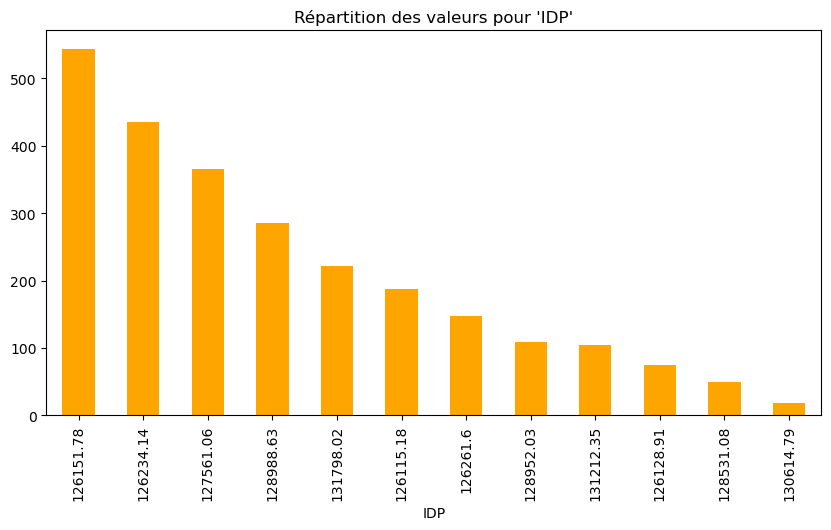

In [34]:
# 3. Analyse des variables catégoriques
print("\nAnalyse des variables catégoriques :")
for col in data.select_dtypes(include=['object']).columns:
    print(f"\nRépartition des valeurs pour la colonne '{col}':")
    print(data[col].value_counts())
    data[col].value_counts().plot(kind='bar', figsize=(10, 5), color='orange')
    plt.title(f"Répartition des valeurs pour '{col}'")
    plt.show()


Boîtes à moustaches pour les colonnes numériques :


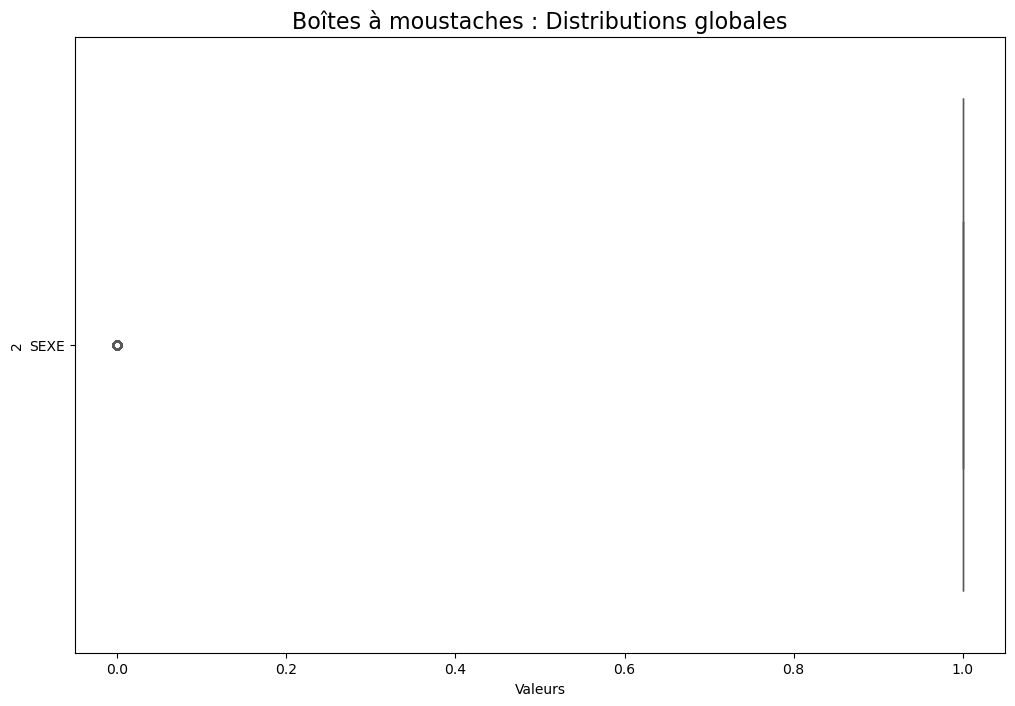

La colonne 'GRADE' n'existe pas dans les données.


In [35]:
# 1. Boîtes à moustaches pour chaque colonne numérique (distributions globales)
numeric_columns = data.select_dtypes(include=['float', 'int']).columns

print("\nBoîtes à moustaches pour les colonnes numériques :")
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_columns], orient='h', palette='Set2')
plt.title("Boîtes à moustaches : Distributions globales", fontsize=16)
plt.xlabel("Valeurs")
plt.show()

# 2. Boîtes à moustaches par groupes (comparaison par catégories)
categorical_column = 'GRADE' 
list_colum = ['DERNIER_AVACEMENT_EN_GRADE', 'GRADE', 'CITE']
if categorical_column in numeric_columns:
    print(f"\nBoîtes à moustaches : Comparaison par '{categorical_column}'")
    for col in list_colum:
        # plt.figure(figsize=(10, 6))
        # sns.boxplot(
        #     data=data, 
        #     x=categorical_column, 
        #     y=col, 
        #     palette='Set3',  # Palette de couleurs
        #     dodge=False  # Empêche le décalage des boîtes
        # )
        # plt.title(f"Distribution de '{col}' par '{categorical_column}'", fontsize=14)
        # plt.xlabel(categorical_column)
        # plt.ylabel(col)
        # plt.show()
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data, x=categorical_column, y=col, hue=categorical_column, palette='Set3', dodge=False, legend=False)
        plt.title(f"Distribution de '{col}' par '{categorical_column}'", fontsize=14)
        plt.xlabel(categorical_column)
        plt.ylabel(col)
        plt.show()
else:
    print(f"La colonne '{categorical_column}' n'existe pas dans les données.")



Colonne 'GRADE' contient des valeurs non numériques :
['11' '12' '13' '14' '15' '16' '17' '18' '19' '21' '22' '23' '24' '25'
 '26' '27' '28' '29' '32' '33' '34' '35' '36']

Colonne 'SALAIRE__PERS' contient des valeurs non numériques :
[47865.44225 47652.18334 47348.71096 ... 54487.73462 56328.15476
 54110.64791]

Colonne 'CITE' contient des valeurs non numériques :
['06' '05' '01' '02' '08' '07' '12' '04' '03' '09' '10' '14' '15' '13'
 '16' '11']

Colonne 'ETATCIVIL' contient des valeurs non numériques :
['4' '0' '1' '3']

Colonne 'INDEPOUSE' contient des valeurs non numériques :
['1' '0']

Colonne 'ENFANT' contient des valeurs non numériques :
[0 1 3 2 8 6 4 5 9 7 10 11 12 14 13]

Colonne 'COTATION' contient des valeurs non numériques :
['64' '68' '67' '63' '65' '76' '48' '62' '60' '55' '58' '54' '0' '56' '70'
 '59' '66' '52' '42' '69' '61' '90' '78' '72' '47' '57' '73' '75' '74'
 '77' '80' '71' '41' '84' '49' '82' '81' '86' '85' '83' '79' '88' '87'
 '89' '43' '50' '51' '45']

Colonn

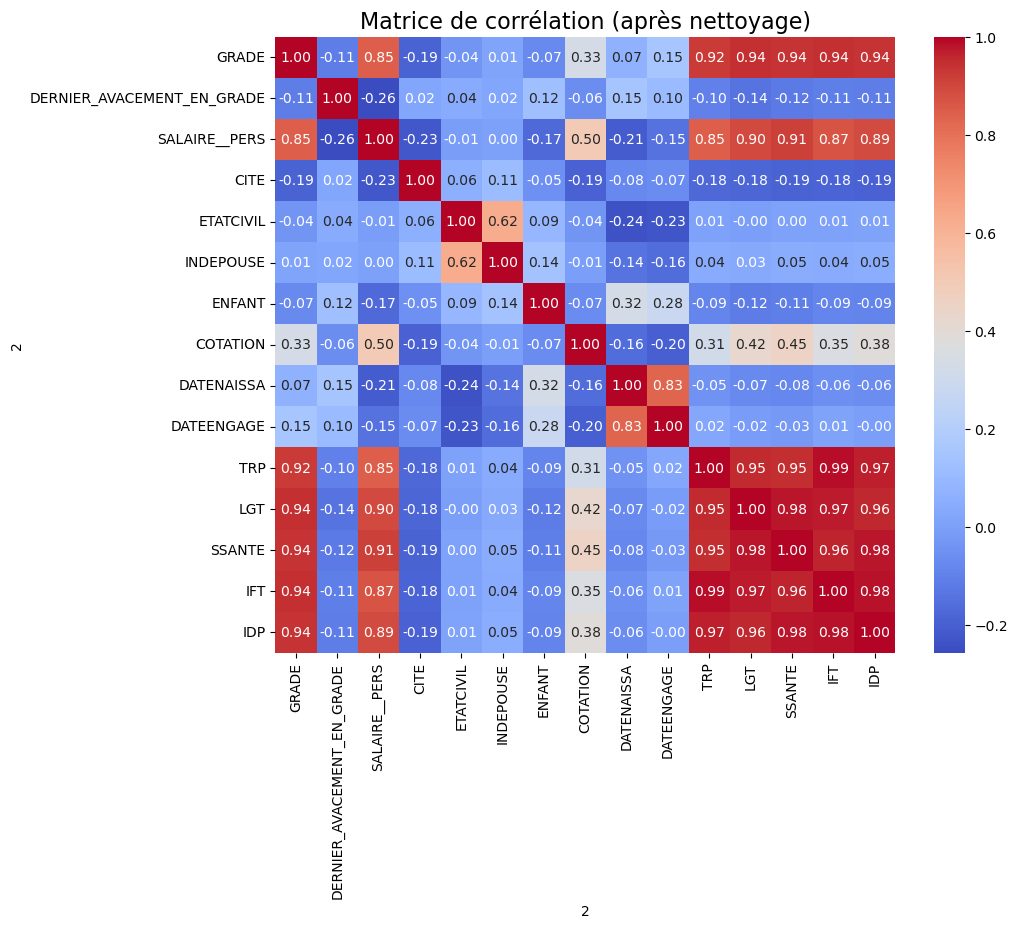

In [36]:
# 4. Matrice de corrélation pour les variables numériques

# Identifier les colonnes contenant des valeurs non numériques
for col in data.columns:
    if data[col].dtype == 'object':  # Vérifie si la colonne est de type "object" (texte)
        print(f"\nColonne '{col}' contient des valeurs non numériques :")
        print(data[col].unique())  # Affiche les valeurs uniques pour détecter les anomalies


# Conversion forcée en numérique avec remplacement des valeurs non conformes par NaN
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Remplace les non-conformes par NaN
    except ValueError:
        print(f"Impossible de convertir la colonne '{col}' en numérique.")


# Filtrer uniquement les colonnes numériques pour la matrice de corrélation
numeric_data = data.select_dtypes(include=['float', 'int'])
# Exclure la colonne 'SEXE'
numeric_data = numeric_data.drop(columns=['SEXE'], errors='ignore')

# Vérification après sélection
# print("\nColonnes utilisées pour la matrice de corrélation :")
# print(numeric_data.columns)

# Calcul et affichage de la matrice de corrélation
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matrice de corrélation (après nettoyage)", fontsize=16)
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes pertinentes pour le clustering (adapte-les selon tes données)
columns_for_clustering = ['TRP', 'LGT', 'SSANTE', 'IFT', 'IDP', 'GRADE', 'SALAIRE__PERS', 'DERNIER_AVACEMENT_EN_GRADE']
data_clustering = data[columns_for_clustering].dropna()  # Supprime les lignes avec des NaN

# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)


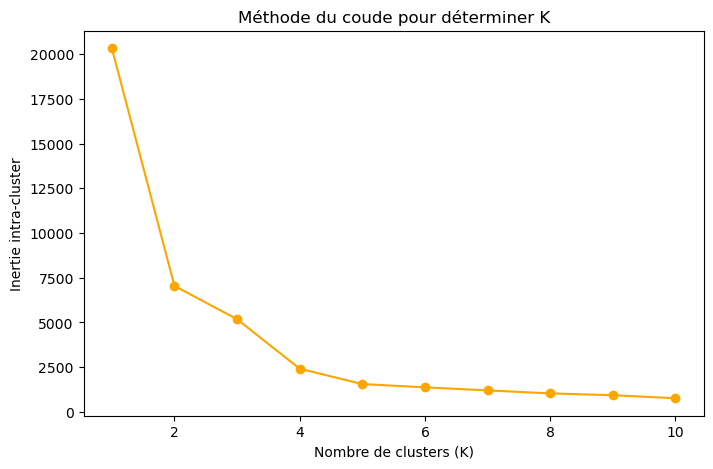

In [38]:
# Méthode du coude pour déterminer le nombre de clusters
inertia = []
k_range = range(1, 11)  # Tester de 1 à 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', color='orange')
plt.title("Méthode du coude pour déterminer K")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie intra-cluster")
plt.show()


In [39]:
# Appliquer K-Means avec le nombre optimal de clusters
optimal_k = 3  # Choisir le K basé sur la méthode du coude
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Ajouter les clusters aux données originales
data_clustering['Cluster'] = clusters


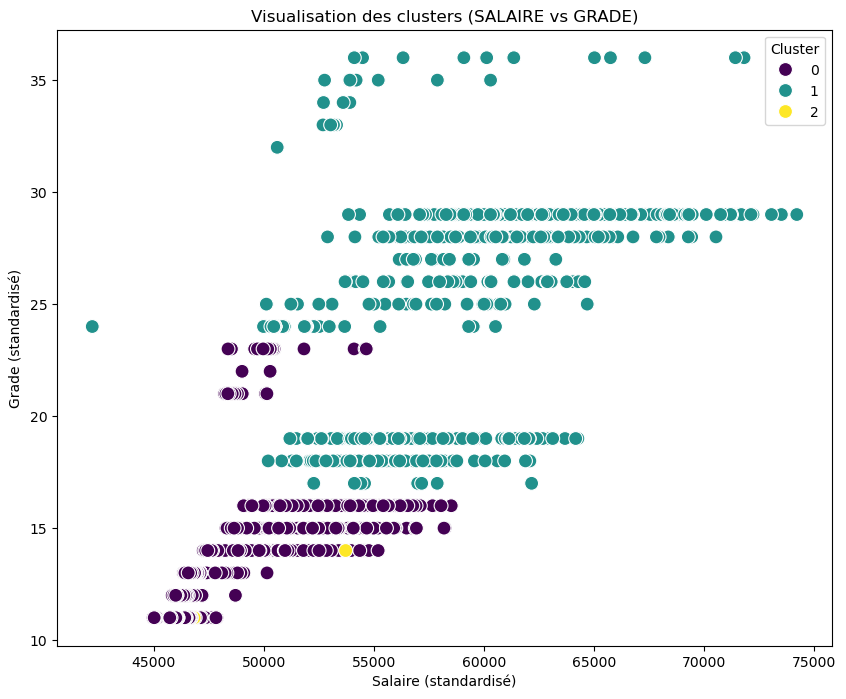

In [40]:
# Visualisation des clusters en 2D ['TRP', 'LGT', 'SSANTE', 'IFT', 'IDP', 'GRADE', 'SALAIRE__PERS', 'DERNIER_AVACEMENT_EN_GRADE']
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=data_clustering, 
    x='SALAIRE__PERS', y='GRADE', 
    hue='Cluster', palette='viridis', s=100
)
plt.title("Visualisation des clusters (SALAIRE vs GRADE)")
plt.xlabel("Salaire (standardisé)")
plt.ylabel("Grade (standardisé)")
plt.legend(title="Cluster")
plt.show()


In [41]:
# Définir la variable cible (par exemple, 'SALAIRE__PERS')
target_variable = 'SALAIRE__PERS'

# Sélectionner les variables explicatives (toutes sauf la variable cible et 'Cluster')
X = data_clustering.drop(columns=[target_variable, 'Cluster'])  # Exclure 'Cluster' et la variable cible
y = data_clustering[target_variable]  # Variable cible ('SALAIRE__PERS')

# Vérification des variables explicatives et de la variable cible
print("\nAperçu des variables explicatives (X) :")
print(X.head())

print("\nAperçu de la variable cible (y) :")
print(y.head())


Aperçu des variables explicatives (X) :
2       TRP       LGT     SSANTE       IFT        IDP  GRADE  \
3  124800.0  91627.03  270515.44  97837.51  126115.18     11   
4  124800.0  91627.03  270515.44  97837.51  126115.18     11   
5  124800.0  91627.03  270515.44  97837.51  126115.18     11   
6  124800.0  91627.03  270515.44  97837.51  126115.18     11   
7  124800.0  91627.03  270515.44  97837.51  126115.18     11   

2  DERNIER_AVACEMENT_EN_GRADE  
3          899251200000000000  
4          904608000000000000  
5          965088000000000000  
6          970358400000000000  
7          975628800000000000  

Aperçu de la variable cible (y) :
3    47865.44225
4    47652.18334
5    47348.71096
6    47115.68266
7    47344.56758
Name: SALAIRE__PERS, dtype: float64


In [42]:
from sklearn.model_selection import train_test_split

# Séparation des données en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification de la taille des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Taille de l'ensemble d'entraînement : (2032, 7)
Taille de l'ensemble de test : (509, 7)


In [43]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Appliquer la standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA pour réduire la dimensionnalité (conserver 95% de la variance)
pca = PCA(n_components=0.95)  # Conserver 95% de la variance
X_pca = pca.fit_transform(X_scaled)

# Vérification de la forme des données après PCA
print(f"Forme des données après PCA : {X_pca.shape}")


Forme des données après PCA : (2541, 2)


In [44]:
from sklearn.model_selection import train_test_split

# Séparation des données en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Vérification de la taille des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")


Taille de l'ensemble d'entraînement : (2032, 2)
Taille de l'ensemble de test : (509, 2)


In [45]:
# Initialiser le modèle de régression Ridge
ridge_model = Ridge()

# Entraîner le modèle avec les données d'entraînement
ridge_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = ridge_model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (RMSE) en utilisant mean_squared_error sans 'squared' (méthode correcte)
mse = mean_squared_error(y_test, y_pred)  # Erreur quadratique moyenne
rmse = np.sqrt(mse)  # Racine de l'erreur quadratique moyenne (RMSE)
print(f"Erreur quadratique moyenne (RMSE) avec le modèle Ridge : {rmse}")


Erreur quadratique moyenne (RMSE) avec le modèle Ridge : 2445.1660034489487


In [46]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à tester pour alpha
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 5]}

# Créer l'objet GridSearchCV pour effectuer la recherche
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Entraîner GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Meilleur paramètre alpha trouvé : {grid_search.best_params_['alpha']}")

# Meilleur modèle
best_ridge_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_best = best_ridge_model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (RMSE) pour le meilleur modèle
mse_best = mean_squared_error(y_test, y_pred_best)  # Erreur quadratique moyenne pour le meilleur modèle
rmse_best = np.sqrt(mse_best)  # Racine de l'erreur quadratique moyenne (RMSE)
print(f"RMSE avec le meilleur modèle : {rmse_best}")


Meilleur paramètre alpha trouvé : 5
RMSE avec le meilleur modèle : 2445.4648067918934


In [47]:
# Afficher la comparaison des résultats
print(f"\nComparaison des performances du modèle Ridge :")
print(f"RMSE avant optimisation (modèle de base) : {rmse}")
print(f"RMSE après optimisation (meilleur modèle) : {rmse_best}")

# Si RMSE après optimisation est inférieur, cela signifie que l'optimisation a amélioré les résultats.



Comparaison des performances du modèle Ridge :
RMSE avant optimisation (modèle de base) : 2445.1660034489487
RMSE après optimisation (meilleur modèle) : 2445.4648067918934


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entraîner le modèle Random Forest
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Calcul de la RMSE pour le modèle Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE avec le modèle Random Forest : {rmse_rf}")


RMSE avec le modèle Random Forest : 1531.2503216129035


In [49]:
# Afficher les statistiques de 'DERNIER_AVACEMENT_EN_GRADE'
print(X['DERNIER_AVACEMENT_EN_GRADE'].describe())

# Si les valeurs extrêmes sont erronées, les remplacer par la médiane ou les supprimer
# Exemple : Remplacer les valeurs aberrantes par la médiane
median_value = X['DERNIER_AVACEMENT_EN_GRADE'].median()

# Remplacer les valeurs supérieures à un seuil arbitraire par la médiane
threshold = 1e+16  # Exemple de seuil pour identifier les valeurs extrêmes
X['DERNIER_AVACEMENT_EN_GRADE'] = X['DERNIER_AVACEMENT_EN_GRADE'].apply(
    lambda x: median_value if abs(x) > threshold else x
)

# Vérification après modification
print("\nNouvelle description de 'DERNIER_AVACEMENT_EN_GRADE' :")
print(X['DERNIER_AVACEMENT_EN_GRADE'].describe())


count    2.541000e+03
mean     1.478699e+18
std      3.518515e+17
min     -9.223372e+18
25%      1.441066e+18
50%      1.514765e+18
75%      1.640995e+18
max      1.719792e+18
Name: DERNIER_AVACEMENT_EN_GRADE, dtype: float64

Nouvelle description de 'DERNIER_AVACEMENT_EN_GRADE' :
count    2.541000e+03
mean     1.514765e+18
std      1.011399e+05
min      1.514765e+18
25%      1.514765e+18
50%      1.514765e+18
75%      1.514765e+18
max      1.514765e+18
Name: DERNIER_AVACEMENT_EN_GRADE, dtype: float64


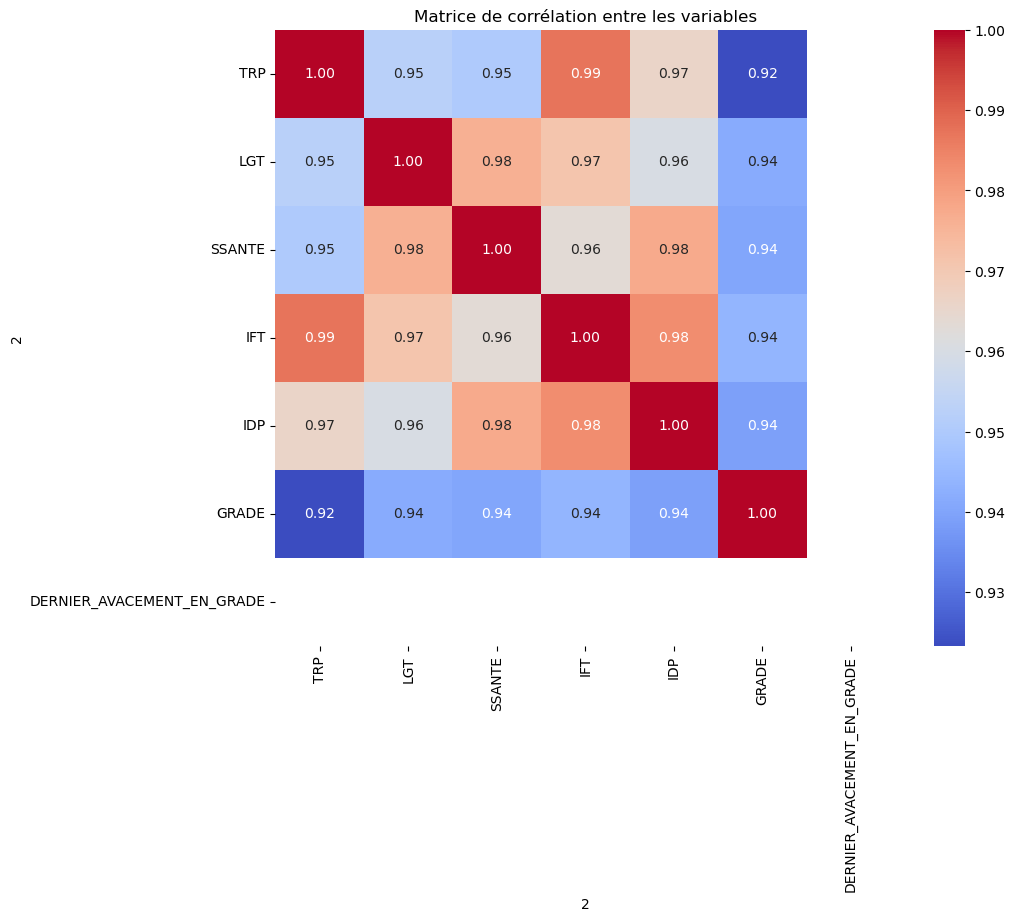

In [50]:
# Calcul de la matrice de corrélation entre les variables de X
correlation_matrix = X.corr()

# Afficher la matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation entre les variables")
plt.show()


In [51]:
# Réentraîner Random Forest avec les données corrigées
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Calcul de la RMSE pour le modèle Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE avec le modèle Random Forest après ajustement : {rmse_rf}")


RMSE avec le modèle Random Forest après ajustement : 1531.2503216129035


In [52]:
# # Créer un DataFrame avec les noms des composantes principales et leurs importances
# importance_df = pd.DataFrame({
#     'Composante Principale': [f'PC{i+1}' for i in range(X_pca.shape[1])],  # Nom des composantes principales
#     'Importance': importances
# })

# # Trier par importance décroissante
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Afficher les importances
# print("\nImportances des composantes principales dans Random Forest :")
# print(importance_df)


In [53]:
# Vérifier les poids (coefficients) des variables d'origine pour chaque composante principale
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Afficher les poids des composantes principales
print("\nPoids des variables d'origine pour chaque composante principale :")
print(pca_components)



Poids des variables d'origine pour chaque composante principale :
2         TRP       LGT    SSANTE       IFT       IDP     GRADE  \
PC1  0.406509  0.408430  0.408676  0.411442  0.409909  0.400106   
PC2  0.039464 -0.000735  0.019658  0.035663  0.027402  0.023872   

2    DERNIER_AVACEMENT_EN_GRADE  
PC1                   -0.059368  
PC2                    0.997729  


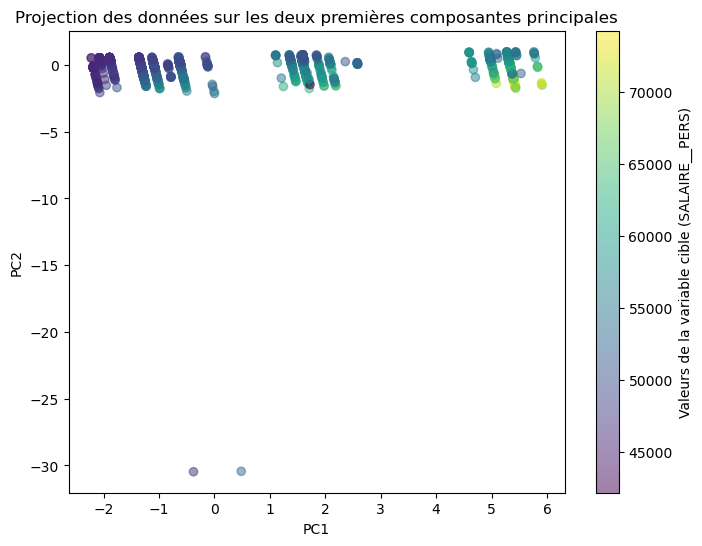

In [54]:
# Visualisation des données projetées sur les deux premières composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(label='Valeurs de la variable cible (SALAIRE__PERS)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.show()


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialiser le modèle Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Entraîner le modèle Gradient Boosting
gb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test)

# Calcul de la RMSE pour le modèle Gradient Boosting
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"RMSE avec le modèle Gradient Boosting : {rmse_gb}")


RMSE avec le modèle Gradient Boosting : 1510.108298080551


In [56]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à tester pour Gradient Boosting
param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}

# Créer l'objet GridSearchCV pour effectuer la recherche
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')

# Entraîner GridSearchCV avec Gradient Boosting
grid_search_gb.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Meilleurs paramètres pour Gradient Boosting : {grid_search_gb.best_params_}")

# Meilleur modèle
best_gb_model = grid_search_gb.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_best_gb = best_gb_model.predict(X_test)

# Calcul de la RMSE pour le meilleur modèle Gradient Boosting
rmse_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))
print(f"RMSE avec le meilleur modèle Gradient Boosting : {rmse_best_gb}")


Meilleurs paramètres pour Gradient Boosting : {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
RMSE avec le meilleur modèle Gradient Boosting : 1518.694766835248
